# Clasificación

## Descripción del Problema
El Centro de Estudios Oncológicos cuenta con la información de pacientes de cáncer de mama. El conjunto de datos fue obtenido en diagnósticos entre 2006 a 2010 y cuenta con la información de 4024 pacientes con diferentes estados de la enfermedad y además con el suceso final del paciente (sobreviviente o no sobreviviente). Poder entender el estado final de una paciente de cáncer se vuelve importante para el Centro por lo que quiere utilizar esta información para tratar de predecir, ante nuevos pacientes, cuál puede ser el estado final de la enfermedad. Contamos con 16 variables que describen el momento de la enfermedad de la paciente.

## Variables
- **Age**: Edad actual del la paciente
- **Race**: Raza de la paciente
- **Marital Status**: Estado civil de la paciente
- **T Stage**: Tamaño o extensión del Tumor
- **N Stage**: Numero o ubicación de los ganglios comprometidos
- **6th Stage**: Estado actual del cancer
- **Differentiate**: Muestra que tan desarrollados estan las celulas cancerigenas
- **Grade**: Grado determinado del cancer
- **A Stage**: Estado de la diseminacion de la enfermedad (Regional: en la zona afectada, Distant: en otras zonas del cuerpo)
- **Tumor size**: Tamaño del tumor en milimetros
- **Estrogen Status**: Estado del estrógeno
- **Regional Node Examined**: Ganglios examinados
- **Reginol Node Positive***: Ganglios positivos con enfermedad
- **Survival Months**: Meses de supervivencia
- **Status**: Estado actual de la paciente(Sobreviviente - Alive; No sobreviviente - Dead)

## Librerias

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Graficos
import matplotlib.pyplot as plt
import seaborn as sb

# Preparacion de Datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split

# Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Busqueda de hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Evaluacion
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# Advertencias
import warnings
warnings.filterwarnings("ignore")


In [2]:
# configuración aletoriedad
np.random.seed(123)
set_config(display = 'diagram', transform_output='pandas')
sb.set_theme(style='darkgrid')
plt.style.use("dark_background") # or default

## Cargar Datos

In [3]:
data_raw = pd.read_csv("datos_medicina.csv")
data_raw.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

## Exploración de Datos

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

### Exploracion Univariable

In [5]:
data_raw.describe()

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

In [6]:
data_raw.describe(include="object")

Race Marital Status T Stage  N Stage 6th Stage  \
count    4024           4024     4024    4024      4024   
unique      3              5        4       3         5   
top     White        Married       T2      N1       IIA   
freq     3413           2643     1786    2732      1305   

                    differentiate Grade   A Stage Estrogen Status  \
count                        4024  4024      4024            4024   
unique                          4     4         2               2   
top     Moderately differentiated     2  Regional        Positive   
freq                         2351  2351      3932            3755   

       Progesterone Status Status  
count                 4024   4024  
unique                   2      2  
top               Positive  Alive  
freq                  3326   3408

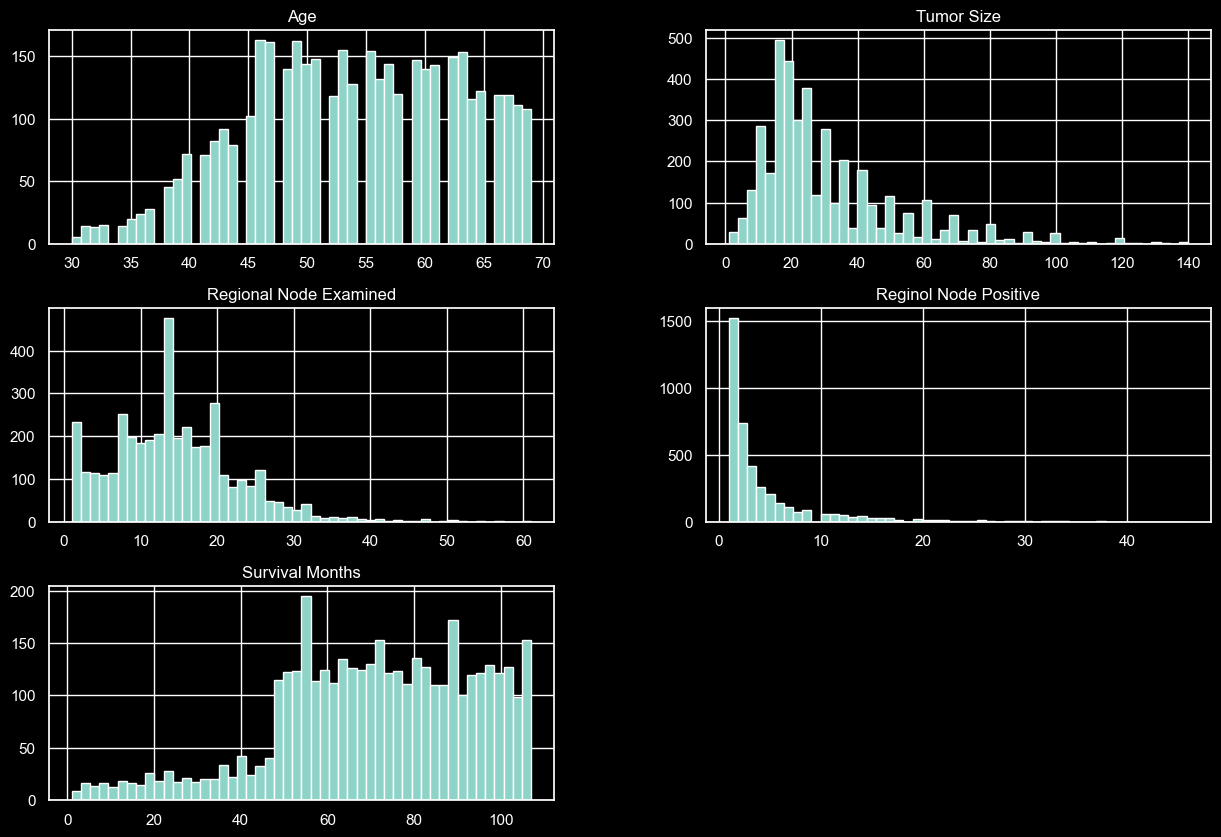

In [7]:
data_raw.hist(bins=50, figsize=(15, 10))
plt.show()

In [8]:
data_raw["Marital Status"].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

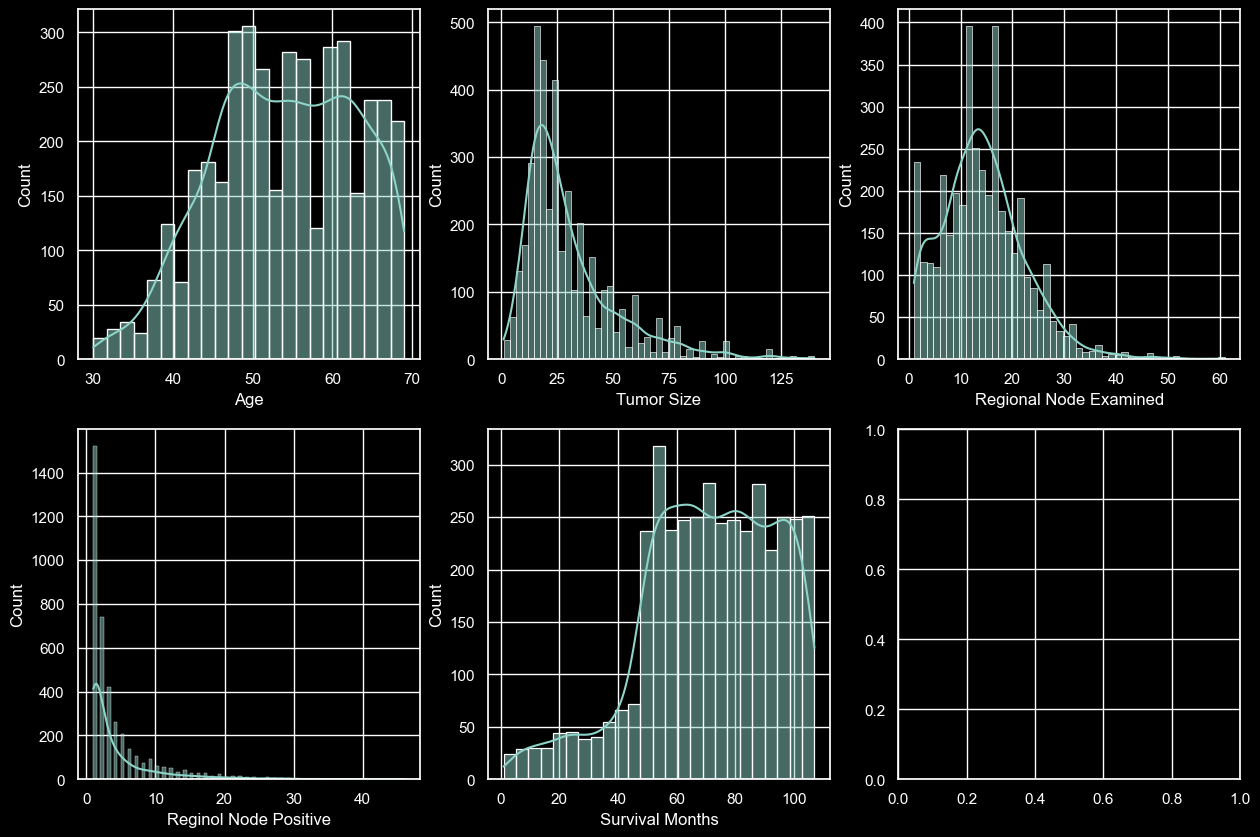

In [9]:
fig, ax = plt.subplots(2, 3, figsize= (15, 10))
sb.histplot(data=data_raw, x="Age", kde=True, ax= ax[0,0])
sb.histplot(data=data_raw, x="Tumor Size", kde=True, ax= ax[0,1])
sb.histplot(data=data_raw, x="Regional Node Examined", kde=True, ax= ax[0,2])
sb.histplot(data=data_raw, x="Reginol Node Positive", kde=True, ax= ax[1,0])
sb.histplot(data=data_raw, x="Survival Months", kde=True, ax= ax[1,1])

plt.show()

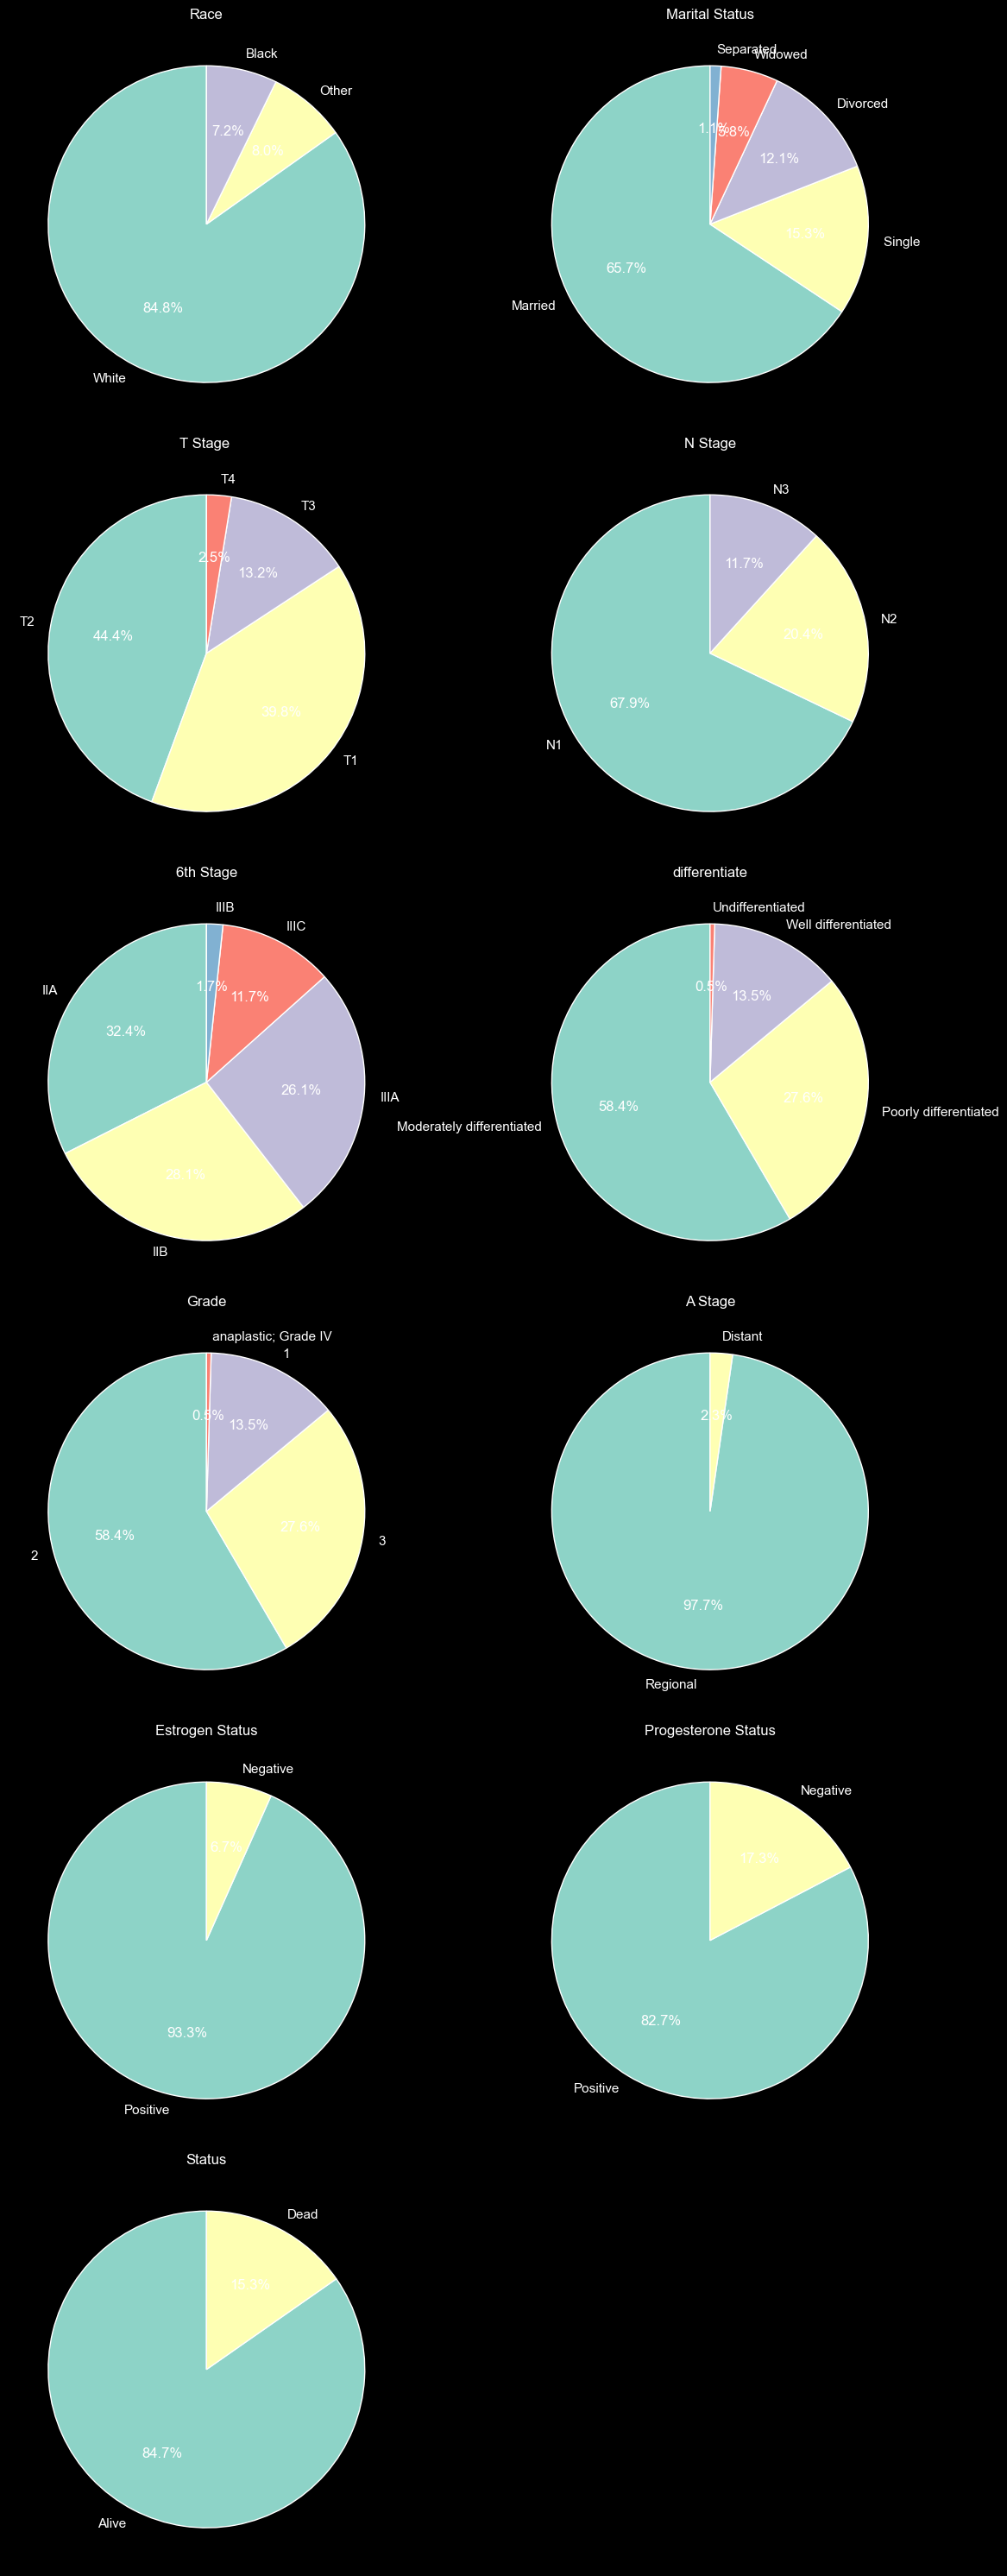

In [10]:
object_columns = data_raw.select_dtypes(include='object').columns
num_cols = 2
num_rows = (len(object_columns) + num_cols - 1) // num_cols  # Calculate rows needed
# Create subplots for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))

# Flatten the axes array for easy iteration, in case of a 2D array
axes = axes.flatten()

# Loop through each object column and plot pie charts
for i, col in enumerate(object_columns):
    value_counts = data_raw[col].value_counts()
    
    # Plot the pie chart in the corresponding grid cell
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)

# Hide any unused subplots if there are fewer columns than grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# for col in data_raw.select_dtypes(include='object').columns:
#     value_counts = data_raw[col].value_counts()

#     plt.figure(figsize=(6, 6))
#     plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
#     plt.title(col)
#     plt.show()

Variables candidata a ser eliminadas:
- _A Stage_
- _Estrogen Status_
- _Progesterone Status_

### Exploración Bi-variado

#### Pairplot

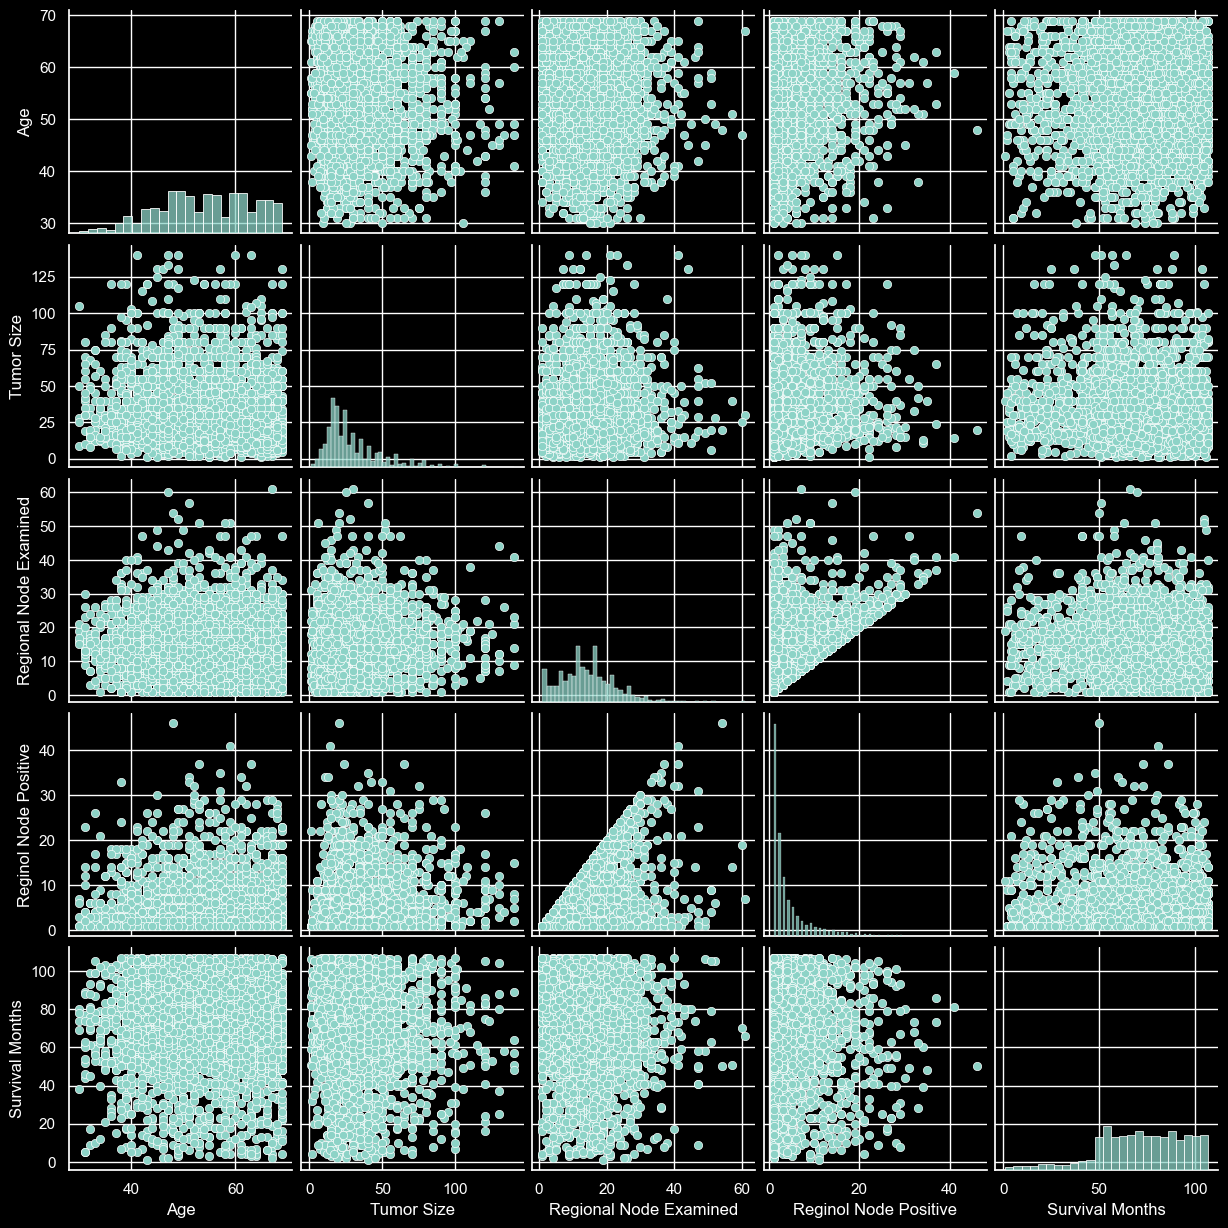

In [11]:
sb.pairplot(data=data_raw)
plt.show()

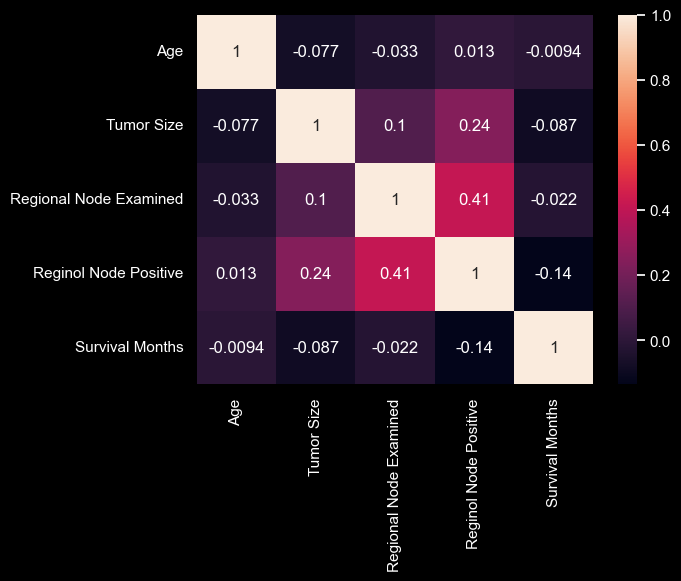

In [12]:
sb.heatmap(data_raw.corr(numeric_only=True), annot=True)
plt.show()

### Exploración Multivariable

#### Pairplot

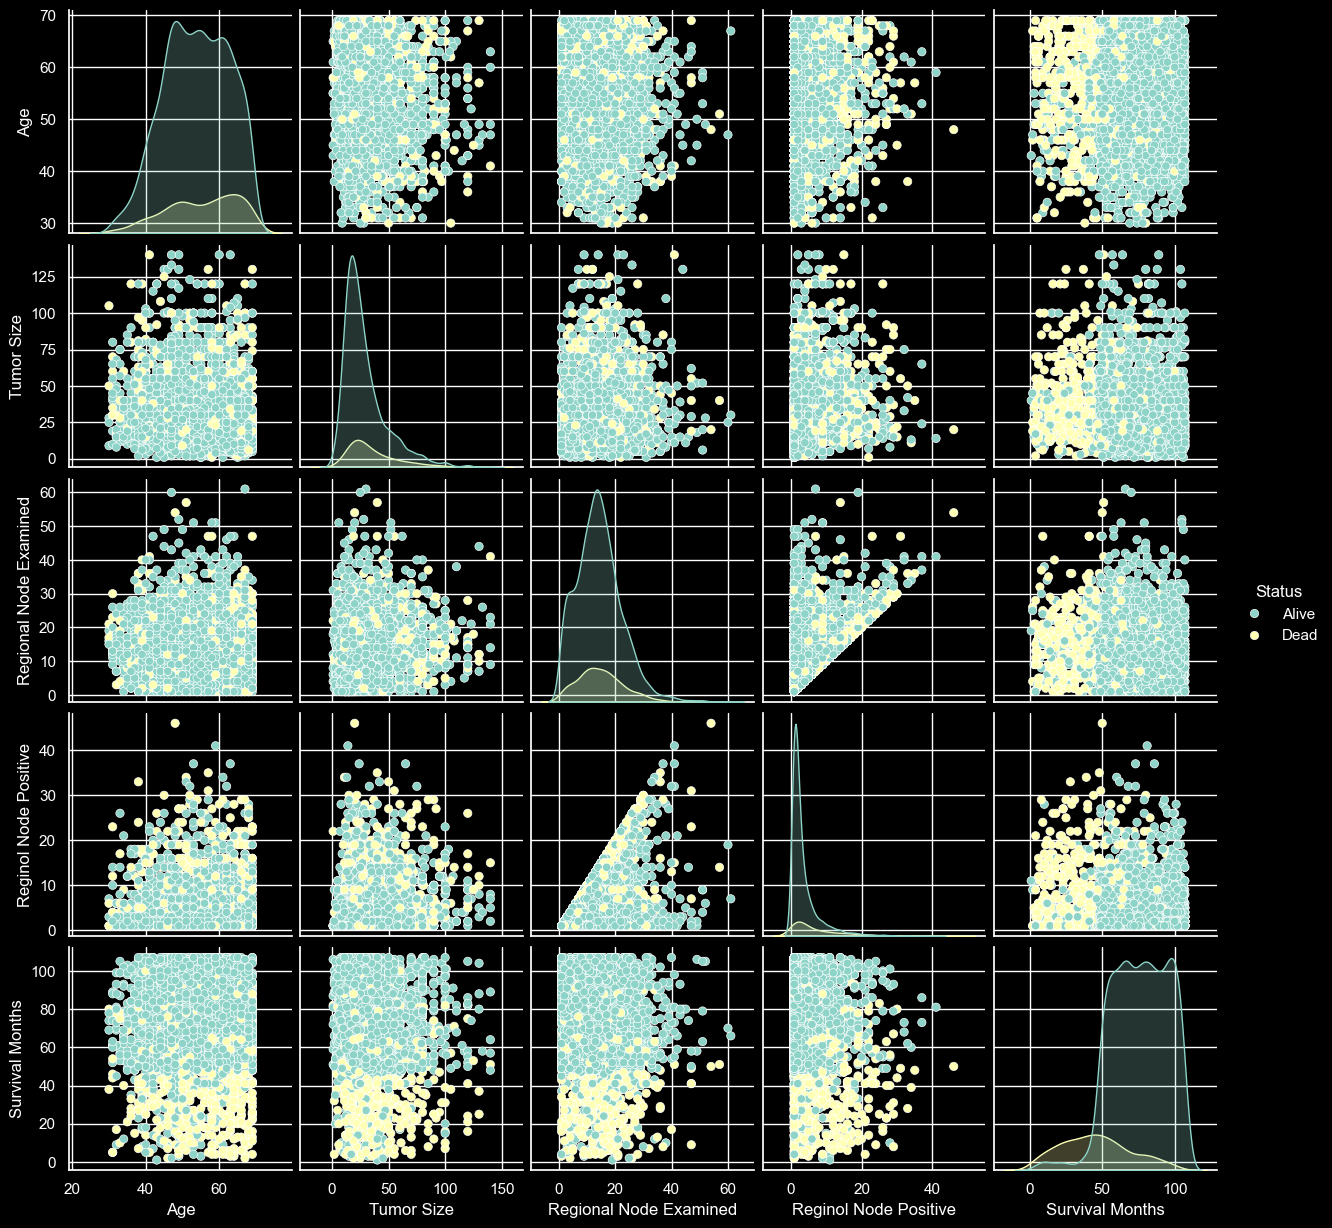

In [13]:
sb.pairplot(data=data_raw, hue="Status")
plt.show()

## Preparación Datos

In [14]:
data = data_raw.copy()
data = data.drop(["A Stage", "Progesterone Status", "Estrogen Status"], axis = 1)
data.head(10)

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   
5   51  White        Single        T1      N1       IIA   
6   51  White        Married       T1      N1       IIA   
7   40  White        Married       T2      N1       IIB   
8   40  White       Divorced       T4      N3      IIIC   
9   69  White        Married       T4      N3      IIIC   

               differentiate Grade  Tumor Size  Regional Node Examined  \
0      Poorly differentiated     3           4                      24   
1  Moderately differentiated     2          35                      14   
2  Moderately differentiated     2          63                      14   
3      Poorly differentiated     3          18                       2   
4      Poorly differentiated     3          41                       3   
5  Moderately differentiated     2          20                      18   
6        Well differentiated     1           8                      11   
7  Moderately differentiated     2          30                       9   
8      Poorly differentiated     3         103                      20   
9        Well differentiated     1          32                      21   

   Reginol Node Positive  Survival Months Status  
0                      1               60  Alive  
1                      5               62  Alive  
2                      7               75  Alive  
3                      1               84  Alive  
4                      1               50  Alive  
5                      2               89  Alive  
6                      1               54  Alive  
7                      1               14   Dead  
8                     18               70  Alive  
9                     12               92  Alive

In [15]:
data_dead = data[data["Status"] == "Dead"]
data_dead.shape

(616, 13)

In [16]:
data_alive = data[data["Status"] == "Alive"]
data_alive.shape

(3408, 13)

#### Resampling

In [17]:
factor = 3

In [18]:
data_dead_re = data_dead.sample(data_dead.shape[0]*factor, replace=True)
data_dead_re.shape

(1848, 13)

In [19]:
data_re = pd.concat([data_alive, data_dead_re]).reset_index(drop=True)
data_re.head(10)

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   
5   51  White        Single        T1      N1       IIA   
6   51  White        Married       T1      N1       IIA   
7   40  White       Divorced       T4      N3      IIIC   
8   69  White        Married       T4      N3      IIIC   
9   46  White        Married       T3      N1      IIIA   

               differentiate Grade  Tumor Size  Regional Node Examined  \
0      Poorly differentiated     3           4                      24   
1  Moderately differentiated     2          35                      14   
2  Moderately differentiated     2          63                      14   
3      Poorly differentiated     3          18                       2   
4      Poorly differentiated     3          41                       3   
5  Moderately differentiated     2          20                      18   
6        Well differentiated     1           8                      11   
7      Poorly differentiated     3         103                      20   
8        Well differentiated     1          32                      21   
9      Poorly differentiated     3          59                      11   

   Reginol Node Positive  Survival Months Status  
0                      1               60  Alive  
1                      5               62  Alive  
2                      7               75  Alive  
3                      1               84  Alive  
4                      1               50  Alive  
5                      2               89  Alive  
6                      1               54  Alive  
7                     18               70  Alive  
8                     12               92  Alive  
9                      3               92  Alive

In [20]:
data_re.shape

(5256, 13)

In [21]:
data_re.describe()

Age   Tumor Size  Regional Node Examined  \
count  5256.000000  5256.000000             5256.000000   
mean     54.328196    32.002664               14.554224   
std       9.084767    22.211003                8.103030   
min      30.000000     1.000000                1.000000   
25%      47.750000    17.000000                9.000000   
50%      55.000000    25.000000               14.000000   
75%      62.000000    40.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            5256.000000      5256.000000  
mean                5.012367        65.158105  
std                 5.957895        25.663465  
min                 1.000000         1.000000  
25%                 1.000000        50.000000  
50%                 2.000000        66.000000  
75%                 6.000000        86.000000  
max                46.000000       107.000000

In [22]:
data_re.describe(include = "object")

Race Marital Status T Stage  N Stage 6th Stage  \
count    5256           5256     5256    5256      5256   
unique      3              5        4       3         5   
top     White        Married       T2      N1       IIA   
freq     4421           3352     2401    3220      1479   

                    differentiate Grade Status  
count                        5256  5256   5256  
unique                          4     4      2  
top     Moderately differentiated     2  Alive  
freq                         2954  2954   3408

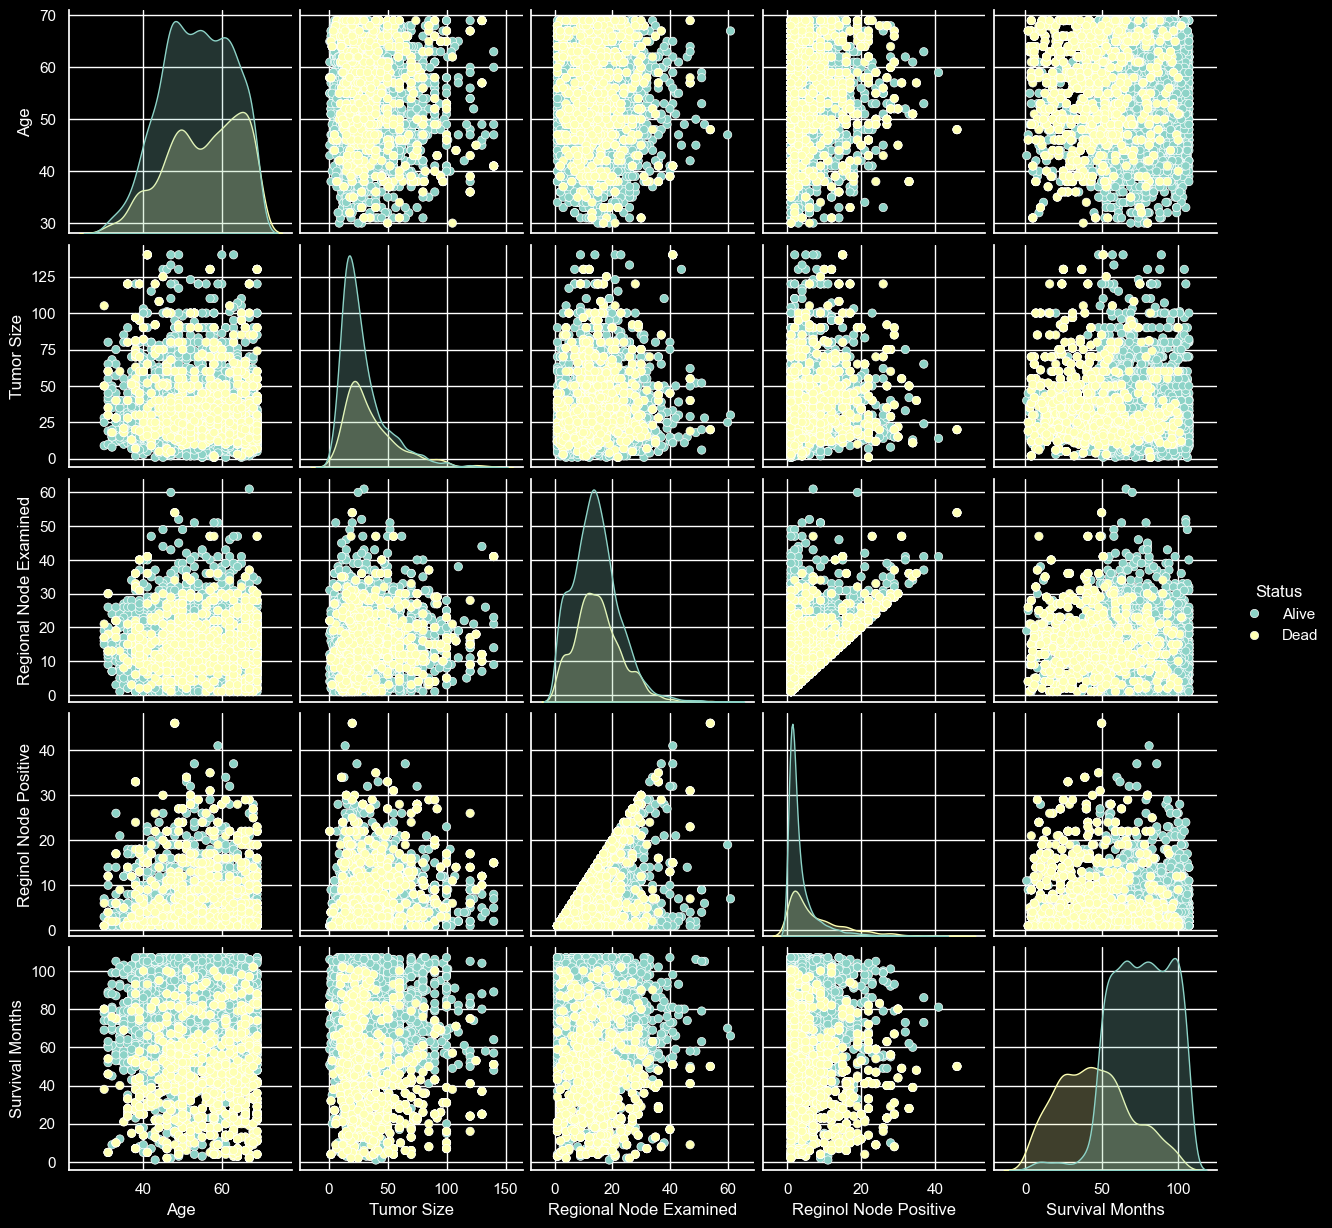

In [23]:
sb.pairplot(data = data_re, hue = "Status")
plt.show()

### Separacion Conjuntos

In [24]:
data_pre = data_re.copy()
num_cols = data_pre.select_dtypes(include=["float64", "int64"]).columns.to_list()
cat_cols = data_pre.drop("Status", axis=1).select_dtypes(include="object").columns.to_list()
y_cols = data_pre[["Status"]].columns.to_list()

X = data_pre.drop("Status", axis=1)
Y = data_pre[["Status"]]

Separamos los conjuntos antes de realizar transformaciones para evitar fuga de datos, de esta forma los transformadores solo tienen conocimiento del conjunto de entrenamiento y no de los de prueba o validación

In [25]:
x_train_pre, x_val_pre, y_train_pre, y_val_pre = train_test_split(
    X,                  # Features (excluding target)
    Y,                  # Target column
    test_size=0.05,     # Adjust split size as needed
    stratify=Y,         # Stratify on the target
    random_state=42     # Set a seed for reproducibility
)

x_train_pre, x_test_pre, y_train_pre, y_test_pre = train_test_split(
    x_train_pre, 
    y_train_pre, 
    test_size=0.15,
    random_state=42,
    stratify=y_train_pre
)


### Transformación Variables

In [26]:
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))])
y_transformer = Pipeline(steps = [("ordinal", OrdinalEncoder())])

preprocesador = ColumnTransformer(transformers = [
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
], remainder = 'passthrough')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Tumor Size', 'Regional Node Examined',
                                  'Reginol Node Positive', 'Survival Months']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Race', 'Marital Status', 'T Stage ',
                                  'N Stage', '6th Stage', 'differentiate',
                                  'Grade'])])

In [27]:
x_train = preprocesador.fit_transform(x_train_pre)
x_test = preprocesador.transform(x_test_pre)
x_val = preprocesador.transform(x_val_pre)

y_train = y_transformer.fit_transform(y_train_pre.values.reshape(-1, 1))
y_test = y_transformer.transform(y_test_pre.values.reshape(-1, 1))
y_val = y_transformer.transform(y_val_pre.values.reshape(-1, 1))

In [28]:
# num_cols = data_re.select_dtypes(include=["float64", "int64"]).columns.to_list()
# cat_cols = data_re.drop("Status", axis=1).select_dtypes(include="object").columns.to_list()
# y_cols = data_re[["Status"]].columns.to_list()

# num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
# cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))])
# y_transformer = Pipeline(steps = [("ordinal", OrdinalEncoder())])

# preprocesador = ColumnTransformer(transformers = [
#     ('num', num_transformer, num_cols),
#     ('cat', cat_transformer, cat_cols),
#     ("ord", y_transformer, y_cols)
# ], remainder = 'passthrough')
# preprocesador


In [29]:
# data_pre = preprocesador.fit_transform(data_re)
# data_pre.columns = [col.replace('cat__', '').replace('num__', '').replace('ord__', '') for col in data_pre.columns]
# data_pre.head()

## Modelado

### Busqueda de Hiperparametros

In [30]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

In [31]:
def get_validation(gridSearch, metric_columns=['mean_test_accuracy', 'mean_test_precision', 
        'mean_test_recall', 'mean_test_f1_score', 'std_test_accuracy',
        'std_test_precision', 'std_test_recall', 'std_test_f1_score']):

    validation = pd.concat([
        pd.DataFrame(gridSearch.cv_results_['params']),
        pd.DataFrame(gridSearch.cv_results_)[metric_columns]
        ], axis=1)
    
    return validation

#### KNN

In [32]:
param_grid_k = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

knn_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_k,
    scoring=scoring,
    refit=False,
    cv = 3, 
    n_jobs = -1
)
_ = knn_search.fit(x_train, y_train)

In [33]:
knn_search.cv_results_

{'mean_fit_time': array([0.15459696, 0.146432  , 0.10389113, 0.01727605, 0.0416654 ,
        0.02291632, 0.01458152, 0.05408279, 0.01236566, 0.01266869]),
 'std_fit_time': array([0.03583039, 0.10078069, 0.06757072, 0.00631418, 0.01537419,
        0.01108819, 0.00250138, 0.04761801, 0.00787037, 0.00085443]),
 'mean_score_time': array([2.20545522, 1.72852103, 1.82995264, 0.5336767 , 1.04883059,
        0.45221408, 0.87507908, 0.46391646, 0.54804341, 0.30079269]),
 'std_score_time': array([0.12605551, 0.08547155, 0.56511963, 0.07793656, 0.0509729 ,
        0.02247583, 0.10010178, 0.0699862 , 0.07286049, 0.02128927]),
 'param_n_neighbors': masked_array(data=[3, 3, 5, 5, 7, 7, 9, 9, 11, 11],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
              mask=[False, False, False, False, False, False, False, False,
   

In [34]:
knn_validation = get_validation(knn_search)
knn_validation

n_neighbors  p  mean_test_accuracy  mean_test_precision  mean_test_recall  \
0            3  1            0.808195             0.814002          0.808195   
1            3  2            0.815501             0.822373          0.815501   
2            5  1            0.782987             0.784610          0.782987   
3            5  2            0.788171             0.789436          0.788171   
4            7  1            0.783462             0.781045          0.783462   
5            7  2            0.784641             0.783081          0.784641   
6            9  1            0.778984             0.776105          0.778984   
7            9  2            0.779692             0.777154          0.779692   
8           11  1            0.774508             0.770576          0.774508   
9           11  2            0.776866             0.772839          0.776866   

   mean_test_f1_score  std_test_accuracy  std_test_precision  std_test_recall  \
0            0.809975           0.014442            0.010391         0.014442   
1            0.817450           0.009565            0.005444         0.009565   
2            0.783056           0.004067            0.005595         0.004067   
3            0.788221           0.003183            0.005444         0.003183   
4            0.781555           0.011832            0.013453         0.011832   
5            0.783405           0.012076            0.013948         0.012076   
6            0.776346           0.010644            0.012160         0.010644   
7            0.777661           0.011841            0.013499         0.011841   
8            0.771012           0.012840            0.014385         0.012840   
9            0.773366           0.016156            0.017676         0.016156   

   std_test_f1_score  
0           0.013498  
1           0.008747  
2           0.004175  
3           0.003715  
4           0.012966  
5           0.013154  
6           0.011823  
7           0.013030  
8           0.014467  
9           0.017779

#### MLP

In [96]:
param_grid_mlp = {
    'hidden_layer_sizes': np.arange(2, 10),
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd', 'lbfgs'] 
}

mlp = MLPClassifier()

mlp_search = GridSearchCV(
    mlp,
    param_grid=param_grid_mlp,
    scoring=scoring,
    refit=False,
    cv = 3, 
    n_jobs = -1
)

_ = mlp_search.fit(x_train, y_train)

In [97]:
mlp_validation = get_validation(mlp_search)
mlp_validation

activation  hidden_layer_sizes solver  mean_test_accuracy  \
0    identity                   2   adam            0.823046   
1    identity                   2    sgd            0.784400   
2    identity                   2  lbfgs            0.825874   
3    identity                   3   adam            0.822339   
4    identity                   3    sgd            0.775923   
..        ...                 ...    ...                 ...   
91       relu                   8    sgd            0.781107   
92       relu                   8  lbfgs            0.820926   
93       relu                   9   adam            0.830587   
94       relu                   9    sgd            0.787705   
95       relu                   9  lbfgs            0.815268   

    mean_test_precision  mean_test_recall  mean_test_f1_score  \
0              0.820973          0.823046            0.819219   
1              0.782943          0.784400            0.773926   
2              0.823884          0.825874            0.822101   
3              0.820264          0.822339            0.818291   
4              0.773687          0.775923            0.764500   
..                  ...               ...                 ...   
91             0.781483          0.781107            0.768768   
92             0.818884          0.820926            0.817379   
93             0.828469          0.830587            0.827403   
94             0.786926          0.787705            0.777348   
95             0.812946          0.815268            0.812381   

    std_test_accuracy  std_test_precision  std_test_recall  std_test_f1_score  
0            0.005607            0.005602         0.005607           0.006184  
1            0.011942            0.010733         0.011942           0.015483  
2            0.005116            0.005002         0.005116           0.006058  
3            0.006063            0.005839         0.006063           0.007241  
4            0.012937            0.012538         0.012937           0.016099  
..                ...                 ...              ...                ...  
91           0.011763            0.010128         0.011763           0.016265  
92           0.011962            0.012480         0.011962           0.013661  
93           0.010872            0.011146         0.010872           0.011715  
94           0.015540            0.012923         0.015540           0.021007  
95           0.001698            0.001471         0.001698           0.002257  

[96 rows x 11 columns]

#### SVC

In [101]:
param_grid_svc = {
    'C': [0.001, 0.01, 1, 10, 15, 20, 25],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]
}

svc = SVC()

svc_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_svc,
    scoring=scoring,
    refit=False,
    cv = 3, 
    n_jobs = -1
)

_ = svc_search.fit(x_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Prec

In [107]:
svc_validation = get_validation(svc_search)
svc_validation

C  degree   kernel  mean_test_accuracy  mean_test_precision  \
0     0.001       2   linear            0.648209             0.420175   
1     0.001       2     poly            0.648209             0.420175   
2     0.001       2      rbf            0.648209             0.420175   
3     0.001       2  sigmoid            0.648209             0.420175   
4     0.001       3   linear            0.648209             0.420175   
..      ...     ...      ...                 ...                  ...   
107  25.000       4  sigmoid            0.624173             0.623857   
108  25.000       5   linear            0.826347             0.825459   
109  25.000       5     poly            0.842837             0.842310   
110  25.000       5      rbf            0.836240             0.835032   
111  25.000       5  sigmoid            0.624173             0.623857   

     mean_test_recall  mean_test_f1_score  std_test_accuracy  \
0            0.648209            0.509857           0.000216   
1            0.648209            0.509857           0.000216   
2            0.648209            0.509857           0.000216   
3            0.648209            0.509857           0.000216   
4            0.648209            0.509857           0.000216   
..                ...                 ...                ...   
107          0.624173            0.623822           0.007981   
108          0.826347            0.821123           0.010778   
109          0.842837            0.842221           0.002950   
110          0.836240            0.832684           0.004145   
111          0.624173            0.623822           0.007981   

     std_test_precision  std_test_recall  std_test_f1_score  
0              0.000280         0.000216           0.000273  
1              0.000280         0.000216           0.000273  
2              0.000280         0.000216           0.000273  
3              0.000280         0.000216           0.000273  
4              0.000280         0.000216           0.000273  
..                  ...              ...                ...  
107            0.008606         0.007981           0.007977  
108            0.010417         0.010778           0.012178  
109            0.003231         0.002950           0.002865  
110            0.003611         0.004145           0.005401  
111            0.008606         0.007981           0.007977  

[112 rows x 11 columns]

#### Naive Bayes 

In [105]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()